In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_parquet('C:/Users/gabri/Desktop/MADS/Git repos/time_series_clustering/data/closing_data.parquet')

In [31]:
df.head()

,LUN-BTC,BCD-BTC,STX-BTC,BNBBEAR-USDT,POA-BNB,BNT-BUSD,POA-BTC,CTXC-BNB,ETC-BUSD,XRPBULL-BUSD,...,ALGO-BUSD,REP-ETH,BCHSV-USDC,BCHABC-USDT,NCASH-ETH,VIBE-BTC,STRAT-USDT,ERD-USDT,DLT-BNB,LOOM-ETH
2017-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


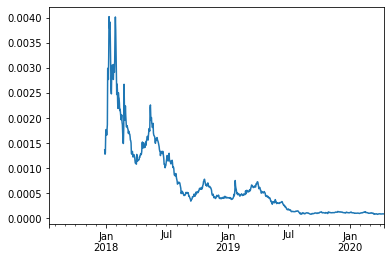

In [32]:
df['LUN-BTC'].plot()

In [33]:
# Math
import math
import numpy as np

# Tools
def tabulate(x, y, f):
    """Return a table of f(x, y). Useful for the Gram-like operations."""
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))

def cos_sum(a, b):
    """To work with tabulate."""
    return(math.cos(a+b))

def gramian_angular_field(serie):
    """
    Compute the Gramian Angular Field of a given time serie.
    Parameters: 
    - serie: (np.array of shape (n, 1)) input time-serie
    Output:
    - gaf: (np.array of shape (n, n)) Gramian Angular Field generated
    """
    # Min-Max scaling
    min_ = np.min(serie)
    max_ = np.max(serie)
    scaled_serie = (2*serie - max_ - min_)/(max_ - min_)
    
    # Floating point inaccuracy!
    scaled_serie = np.where(scaled_serie >= 1., 1., scaled_serie)
    scaled_serie = np.where(scaled_serie <= -1., -1., scaled_serie)

    # Polar encoding
    phi = np.arccos(scaled_serie)
    r = np.linspace(0, 1, len(scaled_serie))
    
    # GAF Computation (every term of the matrix)
    gaf = tabulate(phi, phi, cos_sum)
    return(gaf)

In [34]:
gaf = gramian_angular_field(df['LUN-BTC'].dropna())

[]

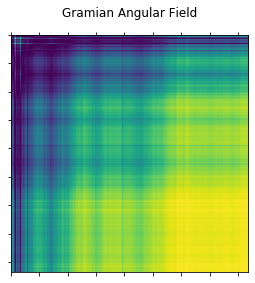

In [35]:
# Gramian Angular Field
# Patchwork
# Instanciate figure
fig = plt.figure(figsize=(10, 10))

size = 0.33
alignement = 0.1


ax_patchwork = fig.add_axes([alignement + 1.8*size, 0.4, size, size])
ax_patchwork.matshow(gaf)
ax_patchwork.set_title("Gramian Angular Field")
ax_patchwork.set_yticklabels([])
ax_patchwork.set_xticklabels([])

# Source

github repo:
https://gist.github.com/devitrylouis/eabdda10ea96d81389d42aeeb3f9ab3e



inpiration paper:
https://aaai.org/ocs/index.php/WS/AAAIW15/paper/viewFile/10179/10251